In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_theme(style="ticks", palette='muted')

In [3]:
df_filled=pd.read_csv('hazadous_filled.csv',index_col=0)

In [4]:
df_filled.head().T

ID,0,1,2,3,5
LOCATION_LATITUDE,45.565061,30.549014,29.845391,29.845391,29.988186
LOCATION_LONGITUDE,-122.742638,-91.168398,-94.90882,-94.90882,-93.987212
COMMODITY_RELEASED_TYPE,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,CRUDE OIL
UNINTENTIONAL_RELEASE_BBLS,0.9,0.88,1.42,0.53,13.0
INTENTIONAL_RELEASE_BBLS,0.0,0.0,8.77,8.77,0.0
RECOVERED_BBLS,0.0,0.88,0.0,0.0,13.0
FATAL,0,0,0,0,0
INJURE,0,0,0,0,0
ACCIDENT_IDENTIFIER,CONTROLLER,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS","LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS","LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS","LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS"
SYSTEM_PART_INVOLVED,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING


In [5]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 0 to 5137
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LOCATION_LATITUDE            4055 non-null   float64
 1   LOCATION_LONGITUDE           4055 non-null   float64
 2   COMMODITY_RELEASED_TYPE      4055 non-null   object 
 3   UNINTENTIONAL_RELEASE_BBLS   4055 non-null   float64
 4   INTENTIONAL_RELEASE_BBLS     4055 non-null   float64
 5   RECOVERED_BBLS               4055 non-null   float64
 6   FATAL                        4055 non-null   int64  
 7   INJURE                       4055 non-null   int64  
 8   ACCIDENT_IDENTIFIER          4055 non-null   object 
 9   SYSTEM_PART_INVOLVED         4055 non-null   object 
 10  DESIGNATED_LOCATION          4055 non-null   object 
 11  FEDERAL                      4055 non-null   object 
 12  LOCATION_TYPE                4055 non-null   object 
 13  INCIDENT_AREA_TYPE

In [6]:
df_filled['EST_COST_TOTAL'] = df_filled[['EST_COST_OPER_PAID', 'EST_COST_GAS_RELEASED', 'EST_COST_PROP_DAMAGE','EST_COST_EMERGENCY', 'EST_COST_ENVIRONMENTAL', 'EST_COST_OTHER']].sum(axis=1)

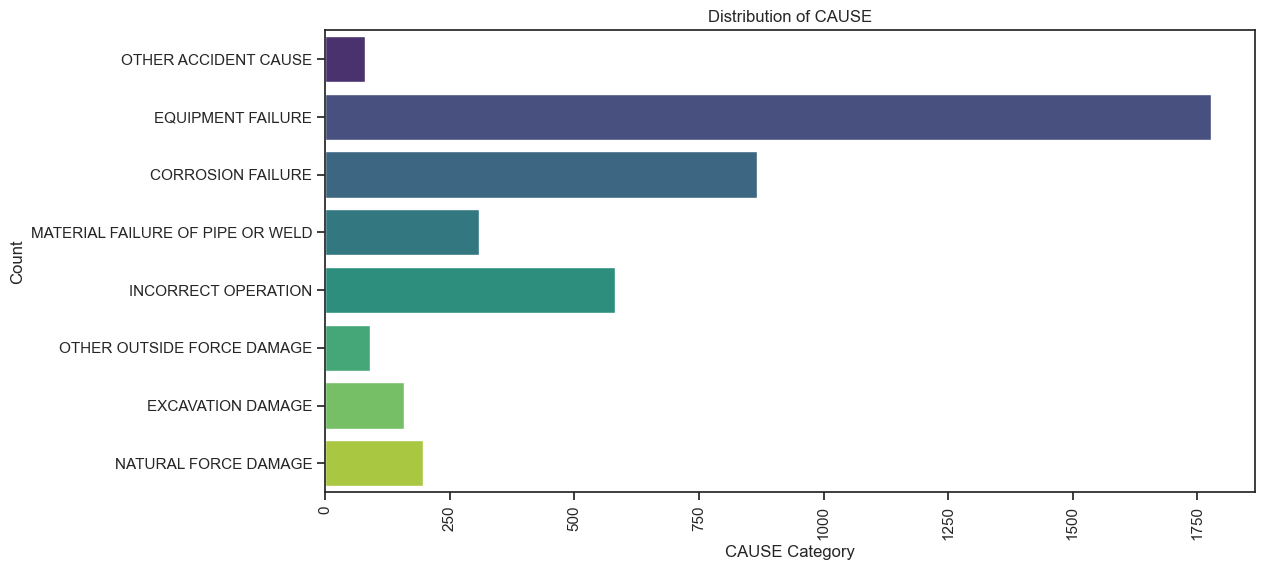

In [7]:
# Plot the distribution of 'CAUSE'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filled, y='CAUSE', palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of CAUSE')
plt.xlabel('CAUSE Category')
plt.ylabel('Count')
plt.show()

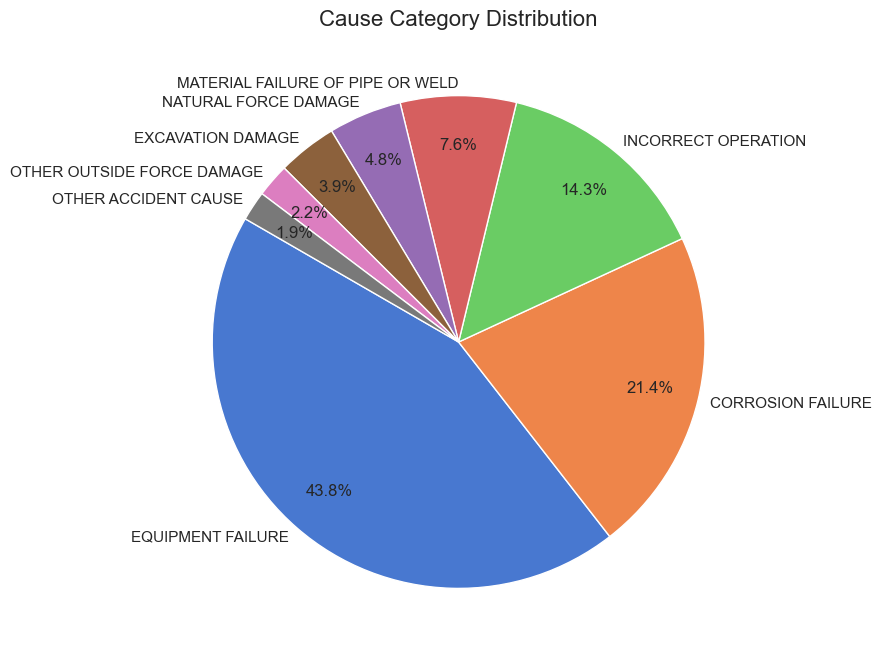

In [8]:
plt.figure(figsize=(10, 8))
cause_counts = df_filled['CAUSE'].value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=150, pctdistance=0.8, labeldistance=1.05)
plt.title('Cause Category Distribution', fontdict={'fontsize':16})
plt.show()

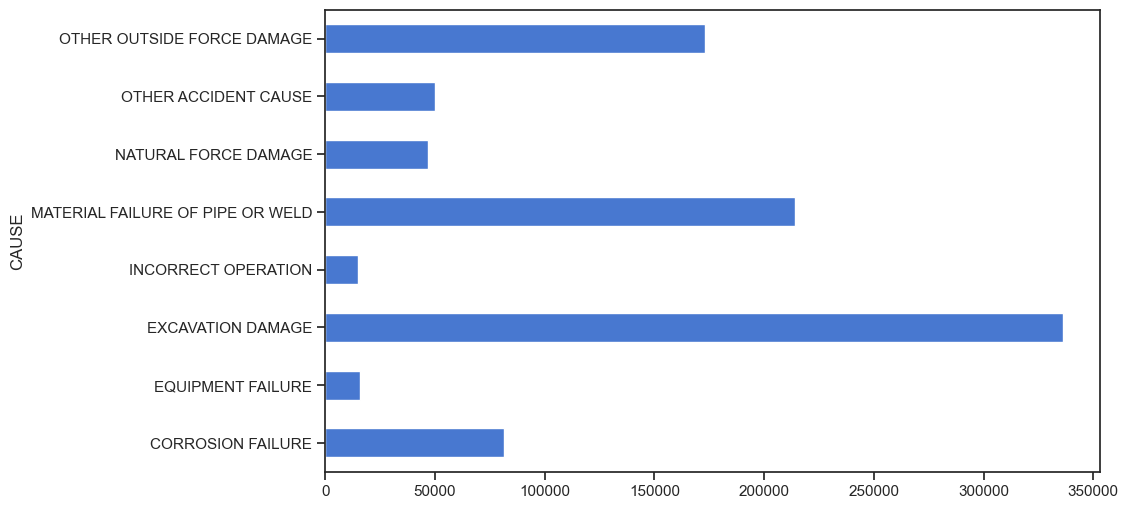

In [9]:
plt.figure(figsize=(10, 6))
df_filled.groupby('CAUSE')['EST_COST_TOTAL'].agg('median').plot(kind='barh')
plt.show()

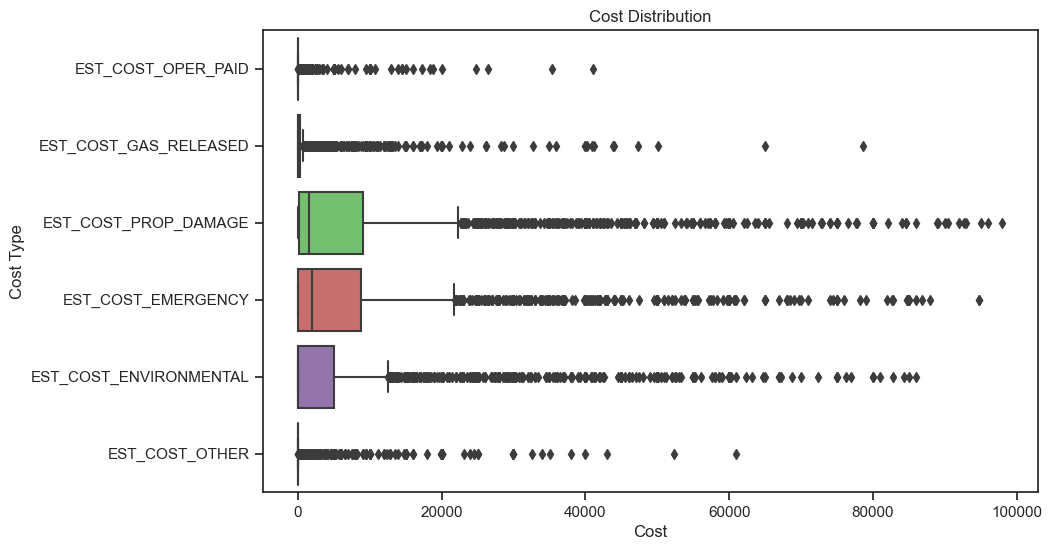

In [10]:
cost_columns = ['EST_COST_OPER_PAID', 'EST_COST_GAS_RELEASED', 'EST_COST_PROP_DAMAGE', 'EST_COST_EMERGENCY', 'EST_COST_ENVIRONMENTAL', 'EST_COST_OTHER']
cost_df = df_filled[df_filled['EST_COST_TOTAL']<1*1e5][cost_columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=cost_df, orient='h')
plt.title('Cost Distribution')
plt.xlabel('Cost')
plt.ylabel('Cost Type')
plt.show()

In [11]:
df_filled.shape

(4055, 41)

In [12]:
# Drop rows where 'CAUSE' is 'OTHER ACCIDENT CAUSE' or 'OTHER OUTSIDE FORCE DAMAGE'
df_filled = df_filled[(df_filled['CAUSE'] != 'OTHER ACCIDENT CAUSE') & (df_filled['CAUSE'] != 'OTHER OUTSIDE FORCE DAMAGE') & (df_filled['CAUSE'] != 'NATURAL FORCE DAMAGE')]
df_filled.reset_index(drop=True, inplace=True)

In [13]:
df_filled.shape

(3692, 41)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
label_columns = ['CAUSE','CAUSE_DETAILS', 'EST_COST_OPER_PAID', 'EST_COST_GAS_RELEASED', 'EST_COST_PROP_DAMAGE',
                   'EST_COST_EMERGENCY', 'EST_COST_ENVIRONMENTAL', 'EST_COST_OTHER','EST_COST_TOTAL']
X = df_filled.drop(columns=label_columns+['ACCIDENT_IDENTIFIER','DESIGNATED_LOCATION','LOCATION_LATITUDE', 'LOCATION_LONGITUDE','INSTALLATION_YEAR', 'INJURE', 'FATAL' ,'WILDLIFE_IMPACT_IND', 'SOIL_CONTAMINATION','WATER_CONTAM_IND'])

In [16]:
X = pd.get_dummies(X, drop_first=True)
y = df_filled['CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_train.value_counts()

EQUIPMENT FAILURE                   1419
CORROSION FAILURE                    700
INCORRECT OPERATION                  455
MATERIAL FAILURE OF PIPE OR WELD     250
EXCAVATION DAMAGE                    129
Name: CAUSE, dtype: int64

In [18]:
dt_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=4, max_depth=10, ccp_alpha=0.001)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the model's accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8024357239512855

Classification Report:
                                   precision    recall  f1-score   support

               CORROSION FAILURE       0.89      0.92      0.91       167
               EQUIPMENT FAILURE       0.79      0.92      0.85       359
               EXCAVATION DAMAGE       1.00      0.62      0.77        29
             INCORRECT OPERATION       0.64      0.37      0.46       126
MATERIAL FAILURE OF PIPE OR WELD       0.77      0.79      0.78        58

                        accuracy                           0.80       739
                       macro avg       0.82      0.72      0.75       739
                    weighted avg       0.79      0.80      0.79       739



In [19]:
from sklearn.tree import export_graphviz
import subprocess

with open("tree.dot", 'w') as f:
    f = export_graphviz(dt_model,feature_names=X.columns ,out_file=f,filled=True)

command = 'dot -Tpdf tree.dot -o tree.pdf'
subprocess.run(command, shell=True)

CompletedProcess(args='dot -Tpdf tree.dot -o tree.pdf', returncode=0)

In [20]:
pd.DataFrame({'Feature':dt_model.feature_names_in_,'Importance':dt_model.feature_importances_}).sort_values('Importance',ascending=False)

,Feature,Importance
41,RELEASE_TYPE_LEAK-PINHOLE,0.426714
26,ITEM_INVOLVED_PIPE,0.166701
37,"ITEM_INVOLVED_WELD, INCLUDING HEAT-AFFECTED ZONE",0.099666
43,RELEASE_TYPE_MECHANICAL PUNCTURE,0.064966
42,RELEASE_TYPE_LEAK-SEAL OR PACKING,0.060493
...,...,...
36,ITEM_INVOLVED_VALVE,0.000000
16,INCIDENT_AREA_TYPE_TRANSITION AREA,0.000000
15,"INCIDENT_AREA_TYPE_TANK, INCLUDING ATTACHED AP...",0.000000
14,LOCATION_TYPE_TOTALLY CONTAINED ON OPERATOR-CO...,0.000000


In [21]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, min_samples_split=5, max_features='sqrt')
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the model's accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8064952638700947

Classification Report:
                                   precision    recall  f1-score   support

               CORROSION FAILURE       0.86      0.90      0.88       167
               EQUIPMENT FAILURE       0.79      0.93      0.86       359
               EXCAVATION DAMAGE       0.95      0.66      0.78        29
             INCORRECT OPERATION       0.70      0.37      0.48       126
MATERIAL FAILURE OF PIPE OR WELD       0.80      0.78      0.79        58

                        accuracy                           0.81       739
                       macro avg       0.82      0.73      0.76       739
                    weighted avg       0.80      0.81      0.79       739



In [22]:
pd.DataFrame({'Feature':rf_model.feature_names_in_,'Importance':rf_model.feature_importances_}).sort_values('Importance',ascending=False)

,Feature,Importance
41,RELEASE_TYPE_LEAK-PINHOLE,0.155900
26,ITEM_INVOLVED_PIPE,0.103014
3,ACCIDENT_PSIG,0.070301
0,UNINTENTIONAL_RELEASE_BBLS,0.058065
17,INCIDENT_AREA_TYPE_UNDERGROUND,0.055469
...,...,...
8,SYSTEM_PART_INVOLVED_ONSHORE EQUIPMENT AND PIP...,0.000825
46,RELEASE_TYPE_RUPTURE-CIRCUMFERENTIAL,0.000558
34,ITEM_INVOLVED_TAPPING EQUIPMENT,0.000421
16,INCIDENT_AREA_TYPE_TRANSITION AREA,0.000308


In [23]:
prediction=pd.DataFrame({'predict':y_pred,'actual':y_test})
prediction[((prediction['predict']=='INCORRECT OPERATION'))&(prediction['predict']!=prediction['actual'])]
#prediction[((prediction['pred']=='EQUIPMENT FAILURE'))&(prediction['pred']!=prediction['actual'])]

,predict,actual
567,INCORRECT OPERATION,EQUIPMENT FAILURE
149,INCORRECT OPERATION,EQUIPMENT FAILURE
461,INCORRECT OPERATION,EQUIPMENT FAILURE
3094,INCORRECT OPERATION,EQUIPMENT FAILURE
3215,INCORRECT OPERATION,EQUIPMENT FAILURE
2609,INCORRECT OPERATION,EQUIPMENT FAILURE
2266,INCORRECT OPERATION,EQUIPMENT FAILURE
2663,INCORRECT OPERATION,EQUIPMENT FAILURE
1426,INCORRECT OPERATION,EQUIPMENT FAILURE
251,INCORRECT OPERATION,EQUIPMENT FAILURE


In [24]:
prediction=prediction[(prediction['predict'].isin(['INCORRECT OPERATION', 'EQUIPMENT FAILURE'])) & (prediction['actual'].isin(['INCORRECT OPERATION', 'EQUIPMENT FAILURE']))]
pd.crosstab(prediction['actual'],prediction['predict'])

predict,EQUIPMENT FAILURE,INCORRECT OPERATION
actual,,
EQUIPMENT FAILURE,335,20
INCORRECT OPERATION,73,46


In [25]:
df_filled_comb = df_filled.copy()  # Make a copy of the original DataFrame
mapping = {'EQUIPMENT FAILURE': 'EQUIPMENT FAILURE/INCORRECT OPERATION', 'INCORRECT OPERATION': 'EQUIPMENT FAILURE/INCORRECT OPERATION'}
df_filled_comb['CAUSE'] = df_filled_comb['CAUSE'].map(mapping).fillna(df_filled_comb['CAUSE'])

In [26]:
y_comb = df_filled_comb['CAUSE']
X_train, X_test, y_train_comb, y_test_comb = train_test_split(X, y_comb, test_size=0.2, random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 0.5, 0.333],
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  
                           scoring='accuracy',
                           n_jobs=-1
                           )

grid_search.fit(X_train, y_train_comb)

best_params = grid_search.best_params_

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

best_accuracy = accuracy_score(y_test_comb, y_pred)
best_classification_report = classification_report(y_test_comb, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", best_accuracy)
print("\nClassification Report (Best Model):\n", best_classification_report)


Best Hyperparameters: {'max_features': 'sqrt', 'min_samples_split': 5}
Best Model Accuracy: 0.9282814614343707

Classification Report (Best Model):
                                        precision    recall  f1-score   support

                    CORROSION FAILURE       0.88      0.89      0.89       167
EQUIPMENT FAILURE/INCORRECT OPERATION       0.96      0.98      0.97       485
                    EXCAVATION DAMAGE       0.95      0.66      0.78        29
     MATERIAL FAILURE OF PIPE OR WELD       0.79      0.72      0.76        58

                             accuracy                           0.93       739
                            macro avg       0.90      0.81      0.85       739
                         weighted avg       0.93      0.93      0.93       739



In [28]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, max_features='sqrt',min_samples_split=5)
rf_model.fit(X_train, y_train_comb)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_comb, y_pred)
classification_report_str = classification_report(y_test_comb, y_pred)

# Print the model's accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.9282814614343707

Classification Report:
                                        precision    recall  f1-score   support

                    CORROSION FAILURE       0.87      0.89      0.88       167
EQUIPMENT FAILURE/INCORRECT OPERATION       0.96      0.98      0.97       485
                    EXCAVATION DAMAGE       0.95      0.66      0.78        29
     MATERIAL FAILURE OF PIPE OR WELD       0.80      0.74      0.77        58

                             accuracy                           0.93       739
                            macro avg       0.89      0.82      0.85       739
                         weighted avg       0.93      0.93      0.93       739



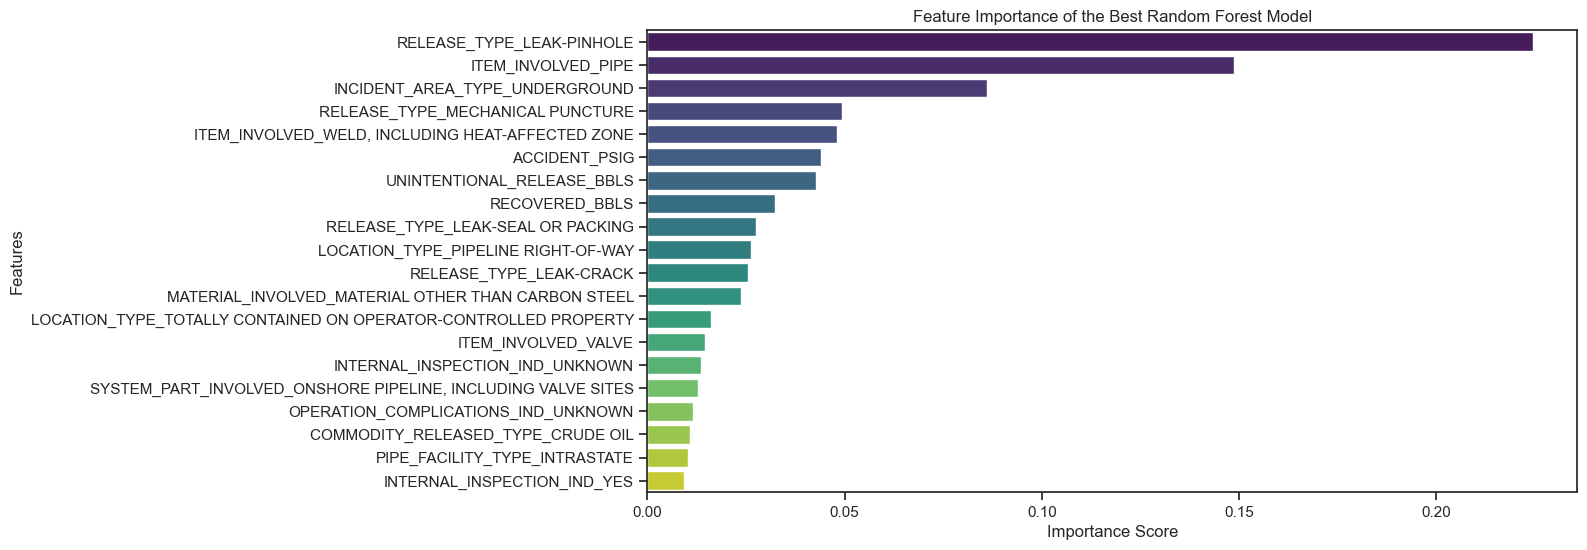

In [29]:
# Get feature importances from the best model
feature_importances = rf_model.feature_importances_

# Get the column names (feature names) from the original DataFrame
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:20], palette='viridis')
plt.title('Feature Importance of the Best Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [31]:
gbdt=GradientBoostingClassifier()
gbdt.fit(X_train,y_train_comb)
print(gbdt.score(X_train,y_train_comb))
print(gbdt.score(X_test,y_test_comb))

0.9627497460209956
0.9350473612990527


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_lab = le.fit_transform(y_train_comb)
y_test_lab=le.transform(y_test_comb)

In [33]:
X_train_renamed=X_train.rename(columns={'PIPELINE_FUNCTION_=< 20% SMYS REGULATED GATHERING':'PIPELINE_FUNCTION_LESS THAN 20% SMYS REGULATED GATHERING',
       'PIPELINE_FUNCTION_> 20% SMYS REGULATED GATHERING':'PIPELINE_FUNCTION_MORE THAN 20% SMYS REGULATED GATHERING',
       'PIPELINE_FUNCTION_> 20% SMYS REGULATED TRANSMISSION':'PIPELINE_FUNCTION_MORE THAN 20% SMYS REGULATED TRANSMISSION'})

X_test_renamed=X_test.rename(columns={'PIPELINE_FUNCTION_=< 20% SMYS REGULATED GATHERING':'PIPELINE_FUNCTION_LESS THAN 20% SMYS REGULATED GATHERING',
       'PIPELINE_FUNCTION_> 20% SMYS REGULATED GATHERING':'PIPELINE_FUNCTION_MORE THAN 20% SMYS REGULATED GATHERING',
       'PIPELINE_FUNCTION_> 20% SMYS REGULATED TRANSMISSION':'PIPELINE_FUNCTION_MORE THAN 20% SMYS REGULATED TRANSMISSION'})

In [34]:
xgb=XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=500)
xgb.fit(X_train_renamed,y_train_lab)
# Make predictions on the test set
y_pred_lab = xgb.predict(X_test_renamed)

# Evaluate the model
accuracy = accuracy_score(y_test_lab, y_pred_lab)
classification_report_str = classification_report(le.inverse_transform(y_test_lab), le.inverse_transform(y_pred_lab))

# Print the model's accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.9377537212449256

Classification Report:
                                        precision    recall  f1-score   support

                    CORROSION FAILURE       0.87      0.91      0.89       167
EQUIPMENT FAILURE/INCORRECT OPERATION       0.97      0.98      0.98       485
                    EXCAVATION DAMAGE       1.00      0.66      0.79        29
     MATERIAL FAILURE OF PIPE OR WELD       0.84      0.79      0.81        58

                             accuracy                           0.94       739
                            macro avg       0.92      0.83      0.87       739
                         weighted avg       0.94      0.94      0.94       739



### Specific on EQUIPMENT FAILURE/INCORRECT OPERATION

In [35]:
# X_train_sub = X_train[y_train_comb=='EQUIPMENT FAILURE/INCORRECT OPERATION']
# y_train_sub = y_train[y_train_comb=='EQUIPMENT FAILURE/INCORRECT OPERATION']
# X_test_sub = X_test[y_pred=='EQUIPMENT FAILURE/INCORRECT OPERATION']
# y_test_sub = y_test[y_pred=='EQUIPMENT FAILURE/INCORRECT OPERATION']
# (len(y_train_sub),len(y_test_sub))

(1874, 493)

In [53]:
X_train_sub = X_train[y_train_lab==1]
y_train_sub = y_train[y_train_lab==1]
X_test_sub = X_test[y_pred_lab==1]
y_test_sub = y_test[y_pred_lab==1]
(len(y_train_sub),len(y_test_sub))

(1899, 469)

In [37]:
y_test_sub.value_counts()

EQUIPMENT FAILURE      355
INCORRECT OPERATION    121
CORROSION FAILURE       12
EXCAVATION DAMAGE        3
Name: CAUSE, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=10000, penalty='l2', C=1)

model.fit(X_train_sub, y_train_sub)
y_pred_sub = model.predict(X_test_sub)
accuracy = accuracy_score(y_test_sub, y_pred_sub)
report = classification_report(y_test_sub, y_pred_sub)
print(f"Accuracy: {accuracy}")
print("Classification Report of Logistic Regression:")
print(report)

Accuracy: 0.7270788912579957
Classification Report of Logistic Regression:
                                  precision    recall  f1-score   support

               CORROSION FAILURE       0.00      0.00      0.00        18
               EQUIPMENT FAILURE       0.75      0.94      0.84       338
               EXCAVATION DAMAGE       0.00      0.00      0.00         3
             INCORRECT OPERATION       0.49      0.21      0.29       109
MATERIAL FAILURE OF PIPE OR WELD       0.00      0.00      0.00         1

                        accuracy                           0.73       469
                       macro avg       0.25      0.23      0.23       469
                    weighted avg       0.66      0.73      0.67       469



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
y_pred=le.inverse_transform(y_pred_lab)
y_pred[y_pred=="EQUIPMENT FAILURE/INCORRECT OPERATION"]=y_pred_sub

In [67]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the model's accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report of the Mixed Model:\n", classification_report_str)

Accuracy: 0.7761194029850746

Classification Report of the Mixed Model:
                                   precision    recall  f1-score   support

               CORROSION FAILURE       0.86      0.87      0.87       174
               EQUIPMENT FAILURE       0.75      0.93      0.83       343
               EXCAVATION DAMAGE       1.00      0.74      0.85        31
             INCORRECT OPERATION       0.49      0.20      0.28       117
MATERIAL FAILURE OF PIPE OR WELD       0.81      0.79      0.80        72

                        accuracy                           0.78       737
                       macro avg       0.78      0.71      0.73       737
                    weighted avg       0.75      0.78      0.75       737



In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test_sub,y_pred= y_pred_sub)
TP=0
TN=0
FP=0
FN=0
for i in range(len(y_pred_sub)):
    if list(y_pred_sub)[i]==list(y_test_sub)[i]:
        if y_pred[i]=="INCORRECT OPERATION":#预测为1且对了
            TP=TP+1
        else:
            TN=TN+1
    else:
        if y_pred[i]=="INCORRECT OPERATION":#预测为1且错了
            FP=FP+1
        else:
            FN=FN+1
print(TP,TN,FP,FN)

20 321 7 121


In [46]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(256, 128, 64,32), batch_size=32, early_stopping=True, activation='relu', solver='adam', max_iter=1000)
# 训练模型
# y_train_sub=[0 if i=="EQUIPMENT FAILURE" else 1 for i in y_train_sub]
# y_train_sub=[0 if i=="EQUIPMENT FAILURE" else 1 for i in y_train_sub]

model.fit(X_train_sub, y_train_sub)
y_pred_sub = model.predict(X_test_sub)
accuracy = accuracy_score(y_test_sub, y_pred_sub)
report = classification_report(y_test_sub, y_pred_sub)
print(f"Accuracy: {accuracy}")
print("Classification Report of Logistic Regression:")
print(report)

Accuracy: 0.7654584221748401
Classification Report of Logistic Regression:
                                  precision    recall  f1-score   support

               CORROSION FAILURE       0.00      0.00      0.00        18
               EQUIPMENT FAILURE       0.78      0.94      0.86       338
               EXCAVATION DAMAGE       0.00      0.00      0.00         3
             INCORRECT OPERATION       0.66      0.37      0.47       109
MATERIAL FAILURE OF PIPE OR WELD       0.00      0.00      0.00         1

                        accuracy                           0.77       469
                       macro avg       0.29      0.26      0.27       469
                    weighted avg       0.72      0.77      0.73       469



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
y_pred=le.inverse_transform(y_pred_lab)
y_pred[y_pred=="EQUIPMENT FAILURE/INCORRECT OPERATION"]=y_pred_sub

In [48]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the model's accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report of the Mixed Model:\n", classification_report_str)

Accuracy: 0.8005427408412483

Classification Report of the Mixed Model:
                                   precision    recall  f1-score   support

               CORROSION FAILURE       0.86      0.87      0.87       174
               EQUIPMENT FAILURE       0.78      0.93      0.85       343
               EXCAVATION DAMAGE       1.00      0.74      0.85        31
             INCORRECT OPERATION       0.66      0.34      0.45       117
MATERIAL FAILURE OF PIPE OR WELD       0.81      0.79      0.80        72

                        accuracy                           0.80       737
                       macro avg       0.82      0.73      0.76       737
                    weighted avg       0.79      0.80      0.79       737



In [51]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [55]:
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train_sub)
pca=PCA(n_components=0.9)
pca.fit(X_train_sub)
X_train_sub=pca.transform(X_train_sub)

model = SVC(kernel='rbf')
model.fit(X_train_sub,y_train_sub)

X_test_sub=scaler.transform(X_test_sub)
X_test_sub=pca.transform(X_test_sub)
y_pred_sub = model.predict(X_test_sub)
accuracy = accuracy_score(y_test_sub, y_pred_sub)
report = classification_report(y_test_sub, y_pred_sub)
# 7. 打印模型性能指标
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7185501066098081
Classification Report:
                                  precision    recall  f1-score   support

               CORROSION FAILURE       0.00      0.00      0.00        18
               EQUIPMENT FAILURE       0.73      0.97      0.83       338
               EXCAVATION DAMAGE       0.00      0.00      0.00         3
             INCORRECT OPERATION       0.43      0.08      0.14       109
MATERIAL FAILURE OF PIPE OR WELD       0.00      0.00      0.00         1

                        accuracy                           0.72       469
                       macro avg       0.23      0.21      0.19       469
                    weighted avg       0.63      0.72      0.63       469



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
y_pred=le.inverse_transform(y_pred_lab)
y_pred[y_pred=="EQUIPMENT FAILURE/INCORRECT OPERATION"]=y_pred_sub

In [57]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the model's accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report of the Mixed Model:\n", classification_report_str)

Accuracy: 0.7706919945725916

Classification Report of the Mixed Model:
                                   precision    recall  f1-score   support

               CORROSION FAILURE       0.86      0.87      0.87       174
               EQUIPMENT FAILURE       0.73      0.96      0.83       343
               EXCAVATION DAMAGE       1.00      0.74      0.85        31
             INCORRECT OPERATION       0.43      0.08      0.13       117
MATERIAL FAILURE OF PIPE OR WELD       0.81      0.79      0.80        72

                        accuracy                           0.77       737
                       macro avg       0.77      0.69      0.70       737
                    weighted avg       0.73      0.77      0.73       737

